# M14_MINI PROJECT_1_Custmer_Churn

In [1]:
import pandas as pd
from custom_functions import *
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump,load 
from sklearn import metrics
import warnings 

pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [9]:
df = pd.read_excel(r"D:\EKEEDA\Data\Mini Project ( 1 )\Telco_Customer_Churn.xlsx")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No  1.0000           No   
1  5575-GNVDE    Male              0      No         No 34.0000          Yes   
2  3668-QPYBK    Male              0      No         No  2.0000          Yes   
3  7795-CFOCW    Male              0      No         No 45.0000           No   
4  9237-HQITU  Female              0      No         No  2.0000          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check         29.8500       29.8500   
1               No               Mailed check         56.9500     1889.5000   
2              Yes               Mailed check         53.8500      108.1500   
3               No  Bank transfer (automatic)         42.3000     1840.7500   
4              Yes           Electronic check             NaN      151.6500   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [16]:
df.shape

(6000, 21)

In [17]:
df.set_index('customerID',inplace =True)
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No  1.0000           No   
5575-GNVDE    Male              0      No         No 34.0000          Yes   
3668-QPYBK    Male              0      No         No  2.0000          Yes   
7795-CFOCW    Male              0      No         No 45.0000           No   
9237-HQITU  Female              0      No         No  2.0000          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG         29.8500       29.8500    No  
5575-GNVDE         56.9500     1889.5000    No  
3668-QPYBK         53.8500      108.1500   Yes  
7795-CFOCW         42.3000     1840.7500    No  
9237-HQITU             NaN      151.6500   Yes

In [18]:
df.shape

(6000, 20)

In [19]:
df['SeniorCitizen'].value_counts()

0    5026
1     974
Name: SeniorCitizen, dtype: int64

<AxesSubplot:xlabel='SeniorCitizen'>

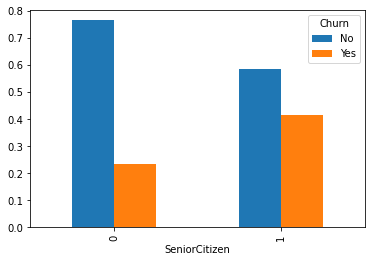

In [20]:
pd.crosstab(df['SeniorCitizen'],df['Churn'],normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='gender'>

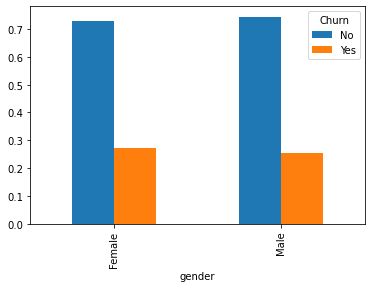

In [21]:
pd.crosstab(df['gender'],df['Churn'],normalize='index').plot(kind='bar')

In [22]:
df.groupby('Churn')['TotalCharges'].mean()

Churn
No    2514.3543
Yes   1504.0237
Name: TotalCharges, dtype: float64

### Checking Data types

In [23]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Convertinf SeniorCitizen To nominal variable

In [24]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(str)

In [25]:
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure              float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Missing value Cahck

In [26]:
#df.isnull().sum()
df.isna().mean()*100

gender              5.0000
SeniorCitizen       0.0000
Partner             0.0000
Dependents          0.0000
tenure              8.1333
PhoneService        0.0000
MultipleLines       0.0000
InternetService     0.0000
OnlineSecurity      0.0000
OnlineBackup        0.0000
DeviceProtection    0.0000
TechSupport         0.0000
StreamingTV         0.0000
StreamingMovies     0.0000
Contract            0.0000
PaperlessBilling    0.0000
PaymentMethod       0.0000
MonthlyCharges      9.5833
TotalCharges       12.5500
Churn               0.0000
dtype: float64

### Missing values handling

In [27]:
df['gender'].fillna(df['gender'].mode()[0],inplace=True) 
df['tenure'].fillna(df['tenure'].median(),inplace=True)  
df['MonthlyCharges'].fillna(df['MonthlyCharges'].median(),inplace=True)  
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)  

In [28]:
df.isna().mean()*100

gender             0.0000
SeniorCitizen      0.0000
Partner            0.0000
Dependents         0.0000
tenure             0.0000
PhoneService       0.0000
MultipleLines      0.0000
InternetService    0.0000
OnlineSecurity     0.0000
OnlineBackup       0.0000
DeviceProtection   0.0000
TechSupport        0.0000
StreamingTV        0.0000
StreamingMovies    0.0000
Contract           0.0000
PaperlessBilling   0.0000
PaymentMethod      0.0000
MonthlyCharges     0.0000
TotalCharges       0.0000
Churn              0.0000
dtype: float64

In [29]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                 
7590-VHVEG  Female             0     Yes         No  1.0000           No   
5575-GNVDE    Male             0      No         No 34.0000          Yes   
3668-QPYBK    Male             0      No         No  2.0000          Yes   
7795-CFOCW    Male             0      No         No 45.0000           No   
9237-HQITU  Female             0      No         No  2.0000          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG         29.8500       29.8500    No  
5575-GNVDE         56.9500     1889.5000    No  
3668-QPYBK         53.8500      108.1500   Yes  
7795-CFOCW         42.3000     1840.7500    No  
9237-HQITU         70.3000      151.6500   Yes

### Columns Catagorisations

In [30]:
nominal_cols = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                   'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                   'StreamingMovies','PaperlessBilling','PaymentMethod']

ordinal_cols = ['Contract']

numeric_cols = ['tenure','MonthlyCharges','TotalCharges']

target = ['Churn']

### Imbalance chack

In [31]:
df['Churn'].value_counts()/len(df)*100

No    73.5667
Yes   26.4333
Name: Churn, dtype: float64

### Outlier Analysis

In [32]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
model_ee.fit(df[numeric_cols])
dump(load,"D:\Test models joblib\mp1_outliers.joblib")
df['anomaly_score']= model_ee.predict(df[numeric_cols])
ee_index=list(df[df['anomaly_score']==-1].index)

In [33]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                 
7590-VHVEG  Female             0     Yes         No  1.0000           No   
5575-GNVDE    Male             0      No         No 34.0000          Yes   
3668-QPYBK    Male             0      No         No  2.0000          Yes   
7795-CFOCW    Male             0      No         No 45.0000           No   
9237-HQITU  Female             0      No         No  2.0000          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  anomaly_score  
customerID                                                     
7590-VHVEG         29.8500       29.8500    No              1  
5575-GNVDE         56.9500     1889.5000    No              1  
3668-QPYBK         53.8500      108.1500   Yes              1  
7795-CFOCW         42.3000     1840.7500    No              1  
9237-HQITU         70.3000      151.6500   Yes              1

In [34]:
len(ee_index)

300

In [35]:
df.drop(ee_index,inplace =True )

In [36]:
df.shape

(5700, 21)

In [37]:
del df['anomaly_score']

In [38]:
df.shape

(5700, 20)

In [39]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                 
7590-VHVEG  Female             0     Yes         No  1.0000           No   
5575-GNVDE    Male             0      No         No 34.0000          Yes   
3668-QPYBK    Male             0      No         No  2.0000          Yes   
7795-CFOCW    Male             0      No         No 45.0000           No   
9237-HQITU  Female             0      No         No  2.0000          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG         29.8500       29.8500    No  
5575-GNVDE         56.9500     1889.5000    No  
3668-QPYBK         53.8500      108.1500   Yes  
7795-CFOCW         42.3000     1840.7500    No  
9237-HQITU         70.3000      151.6500   Yes

## Treating categorical variable

### Target Variable

In [40]:
df['Churn'].replace({'Yes':1 ,'No':0 },inplace=True)

In [41]:
df['Churn'].value_counts()

0    4135
1    1565
Name: Churn, dtype: int64

## Numeric Columns

### Standardisation 

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(df[numeric_cols])

StandardScaler()

In [43]:
dump(sc,"D:\Test models joblib\Sc_joblib.joblib")

['D:\\Test models joblib\\Sc_joblib.joblib']

In [44]:
sc_mp = load("D:\Test models joblib\Sc_joblib.joblib")

In [45]:
sc_df =pd.DataFrame(sc_mp.transform(df[numeric_cols]),columns=numeric_cols,index=df.index)
sc_df

tenure  MonthlyCharges  TotalCharges
customerID                                      
7590-VHVEG -1.2883         -1.2009       -0.9949
5575-GNVDE  0.1558         -0.2452       -0.0756
3668-QPYBK -1.2445         -0.3545       -0.9562
7795-CFOCW  0.6372         -0.7618       -0.0997
9237-HQITU -1.2445          0.2256       -0.9347
...            ...             ...           ...
9661-ACXBS  0.5059          1.4564        1.1659
5656-JAMLX  1.3811         -1.5535       -0.3899
3462-BJQQA -1.0695          0.9116       -0.7365
0442-TDYUO  0.7685         -1.5465       -0.4975
6733-LRIZX  0.1996          1.5887        0.9804

[5700 rows x 3 columns]

In [46]:
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                 
7590-VHVEG  Female             0     Yes         No  1.0000           No   
5575-GNVDE    Male             0      No         No 34.0000          Yes   
3668-QPYBK    Male             0      No         No  2.0000          Yes   
7795-CFOCW    Male             0      No         No 45.0000           No   
9237-HQITU  Female             0      No         No  2.0000          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges  Churn  
customerID                                       
7590-VHVEG         29.8500       29.8500      0  
5575-GNVDE         56.9500     1889.5000      0  
3668-QPYBK         53.8500      108.1500      1  
7795-CFOCW         42.3000     1840.7500      0  
9237-HQITU         70.3000      151.6500      1

In [47]:
df.drop(columns= numeric_cols,inplace =True)

In [48]:
df.head()

gender SeniorCitizen Partner Dependents PhoneService  \
customerID                                                         
7590-VHVEG  Female             0     Yes         No           No   
5575-GNVDE    Male             0      No         No          Yes   
3668-QPYBK    Male             0      No         No          Yes   
7795-CFOCW    Male             0      No         No           No   
9237-HQITU  Female             0      No         No          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  Churn  
customerID                                                                     
7590-VHVEG  Month-to-month              Yes           Electronic check      0  
5575-GNVDE        One year               No               Mailed check      0  
3668-QPYBK  Month-to-month              Yes               Mailed check      1  
7795-CFOCW        One year               No  Bank transfer (automatic)      0  
9237-HQITU  Month-to-month              Yes           Electronic check      1

In [49]:
df= pd.concat([df,sc_df],axis=1)

In [50]:
df.head()

gender SeniorCitizen Partner Dependents PhoneService  \
customerID                                                         
7590-VHVEG  Female             0     Yes         No           No   
5575-GNVDE    Male             0      No         No          Yes   
3668-QPYBK    Male             0      No         No          Yes   
7795-CFOCW    Male             0      No         No           No   
9237-HQITU  Female             0      No         No          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  Churn  \
customerID                                                                      
7590-VHVEG  Month-to-month              Yes           Electronic check      0   
5575-GNVDE        One year               No               Mailed check      0   
3668-QPYBK  Month-to-month              Yes               Mailed check      1   
7795-CFOCW        One year               No  Bank transfer (automatic)      0   
9237-HQITU  Month-to-month              Yes           Electronic check      1   

            tenure  MonthlyCharges  TotalCharges  
customerID                                        
7590-VHVEG -1.2883         -1.2009       -0.9949  
5575-GNVDE  0.1558         -0.2452       -0.0756  
3668-QPYBK -1.2445         -0.3545       -0.9562  
7795-CFOCW  0.6372         -0.7618       -0.0997  
9237-HQITU -1.2445          0.2256       -0.9347

## Ordinal Variables

In [51]:
df['Contract'].value_counts()

Month-to-month    3296
Two year          1221
One year          1183
Name: Contract, dtype: int64

In [52]:
df['Contract'].replace({'Month-to-month':1,'One year':2,'Two year':3},inplace =True)
df['Contract'].value_counts()

1    3296
3    1221
2    1183
Name: Contract, dtype: int64

In [53]:
input_cols = nominal_cols + ordinal_cols + numeric_cols

## Nominal variables

In [54]:
from sklearn.preprocessing import OneHotEncoder 
oh = OneHotEncoder(sparse=False,handle_unknown= 'ignore',dtype=int,drop ='first' )
oh.fit(df[nominal_cols])
dump(oh,"D:\Test models joblib\Ohe_mp1.joblib")
oh_mp = load("D:\Test models joblib\Ohe_mp1.joblib")
oh_df = pd.DataFrame(oh_mp.transform(df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=df.index)
oh_df

gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
customerID                                                              
7590-VHVEG            0                0            1               0   
5575-GNVDE            1                0            0               0   
3668-QPYBK            1                0            0               0   
7795-CFOCW            1                0            0               0   
9237-HQITU            0                0            0               0   
...                 ...              ...          ...             ...   
9661-ACXBS            0                0            0               0   
5656-JAMLX            1                0            0               0   
3462-BJQQA            0                0            0               0   
0442-TDYUO            1                0            1               0   
6733-LRIZX            1                0            0               0   

            PhoneService_Yes  MultipleLines_No phone service  \
customerID                                                     
7590-VHVEG                 0                               1   
5575-GNVDE                 1                               0   
3668-QPYBK                 1                               0   
7795-CFOCW                 0                               1   
9237-HQITU                 1                               0   
...                      ...                             ...   
9661-ACXBS                 1                               0   
5656-JAMLX                 1                               0   
3462-BJQQA                 1                               0   
0442-TDYUO                 1                               0   
6733-LRIZX                 1                               0   

            MultipleLines_Yes  InternetService_Fiber optic  \
customerID                                                   
7590-VHVEG                  0                            0   
5575-GNVDE                  0                            0   
3668-QPYBK                  0                            0   
7795-CFOCW                  0                            0   
9237-HQITU                  0                            1   
...                       ...                          ...   
9661-ACXBS                  1                            1   
5656-JAMLX                  0                            0   
3462-BJQQA                  1                            1   
0442-TDYUO                  0                            0   
6733-LRIZX                  1                            1   

            InternetService_No  OnlineSecurity_No internet service  \
customerID                                                           
7590-VHVEG                   0                                   0   
5575-GNVDE                   0                                   0   
3668-QPYBK                   0                                   0   
7795-CFOCW                   0                                   0   
9237-HQITU                   0                                   0   
...                        ...                                 ...   
9661-ACXBS                   0                                   0   
5656-JAMLX                   1                                   1   
3462-BJQQA                   0                                   0   
0442-TDYUO                   1                                   1   
6733-LRIZX                   0                                   0   

            OnlineSecurity_Yes  OnlineBackup_No internet service  \
customerID                                                         
7590-VHVEG                   0                                 0   
5575-GNVDE                   1                                 0   
3668-QPYBK                   1                                 0   
7795-CFOCW                   1                                 0   
9237-HQITU                   0                                 0   
...                        ...     

In [55]:
df.drop(columns=nominal_cols,inplace =True)
df= pd.concat([df,oh_df],axis=1)
df

Contract  Churn  tenure  MonthlyCharges  TotalCharges  \
customerID                                                          
7590-VHVEG         1      0 -1.2883         -1.2009       -0.9949   
5575-GNVDE         2      0  0.1558         -0.2452       -0.0756   
3668-QPYBK         1      1 -1.2445         -0.3545       -0.9562   
7795-CFOCW         2      0  0.6372         -0.7618       -0.0997   
9237-HQITU         1      1 -1.2445          0.2256       -0.9347   
...              ...    ...     ...             ...           ...   
9661-ACXBS         1      1  0.5059          1.4564        1.1659   
5656-JAMLX         3      0  1.3811         -1.5535       -0.3899   
3462-BJQQA         1      0 -1.0695          0.9116       -0.7365   
0442-TDYUO         3      0  0.7685         -1.5465       -0.4975   
6733-LRIZX         3      0  0.1996          1.5887        0.9804   

            gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
customerID                                                              
7590-VHVEG            0                0            1               0   
5575-GNVDE            1                0            0               0   
3668-QPYBK            1                0            0               0   
7795-CFOCW            1                0            0               0   
9237-HQITU            0                0            0               0   
...                 ...              ...          ...             ...   
9661-ACXBS            0                0            0               0   
5656-JAMLX            1                0            0               0   
3462-BJQQA            0                0            0               0   
0442-TDYUO            1                0            1               0   
6733-LRIZX            1                0            0               0   

            PhoneService_Yes  MultipleLines_No phone service  \
customerID                                                     
7590-VHVEG                 0                               1   
5575-GNVDE                 1                               0   
3668-QPYBK                 1                               0   
7795-CFOCW                 0                               1   
9237-HQITU                 1                               0   
...                      ...                             ...   
9661-ACXBS                 1                               0   
5656-JAMLX                 1                               0   
3462-BJQQA                 1                               0   
0442-TDYUO                 1                               0   
6733-LRIZX                 1                               0   

            MultipleLines_Yes  InternetService_Fiber optic  \
customerID                                                   
7590-VHVEG                  0                            0   
5575-GNVDE                  0                            0   
3668-QPYBK                  0                            0   
7795-CFOCW                  0                            0   
9237-HQITU                  0                            1   
...                       ...                          ...   
9661-ACXBS                  1                            1   
5656-JAMLX                  0                            0   
3462-BJQQA                  1                            1   
0442-TDYUO                  0                            0   
6733-LRIZX                  1                            1   

            InternetService_No  OnlineSecurity_No internet service  \
customerID                                                           
7590-VHVEG                   0                                   0   
5575-GNVDE                   0                                   0   
3668-QPYBK                   0                                   0   
7795-CFOCW                   0                                   0   
9237-HQITU                   0                                   0   
...                        ...    

In [56]:
df.shape

(5700, 30)

In [57]:
x = df.drop(columns=['Churn'])
y = df['Churn']
x.dtypes

Contract                                   int64
tenure                                   float64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                int32
SeniorCitizen_1                            int32
Partner_Yes                                int32
Dependents_Yes                             int32
PhoneService_Yes                           int32
MultipleLines_No phone service             int32
MultipleLines_Yes                          int32
InternetService_Fiber optic                int32
InternetService_No                         int32
OnlineSecurity_No internet service         int32
OnlineSecurity_Yes                         int32
OnlineBackup_No internet service           int32
OnlineBackup_Yes                           int32
DeviceProtection_No internet service       int32
DeviceProtection_Yes                       int32
TechSupport_No internet service            int32
TechSupport_Yes     

<AxesSubplot:>

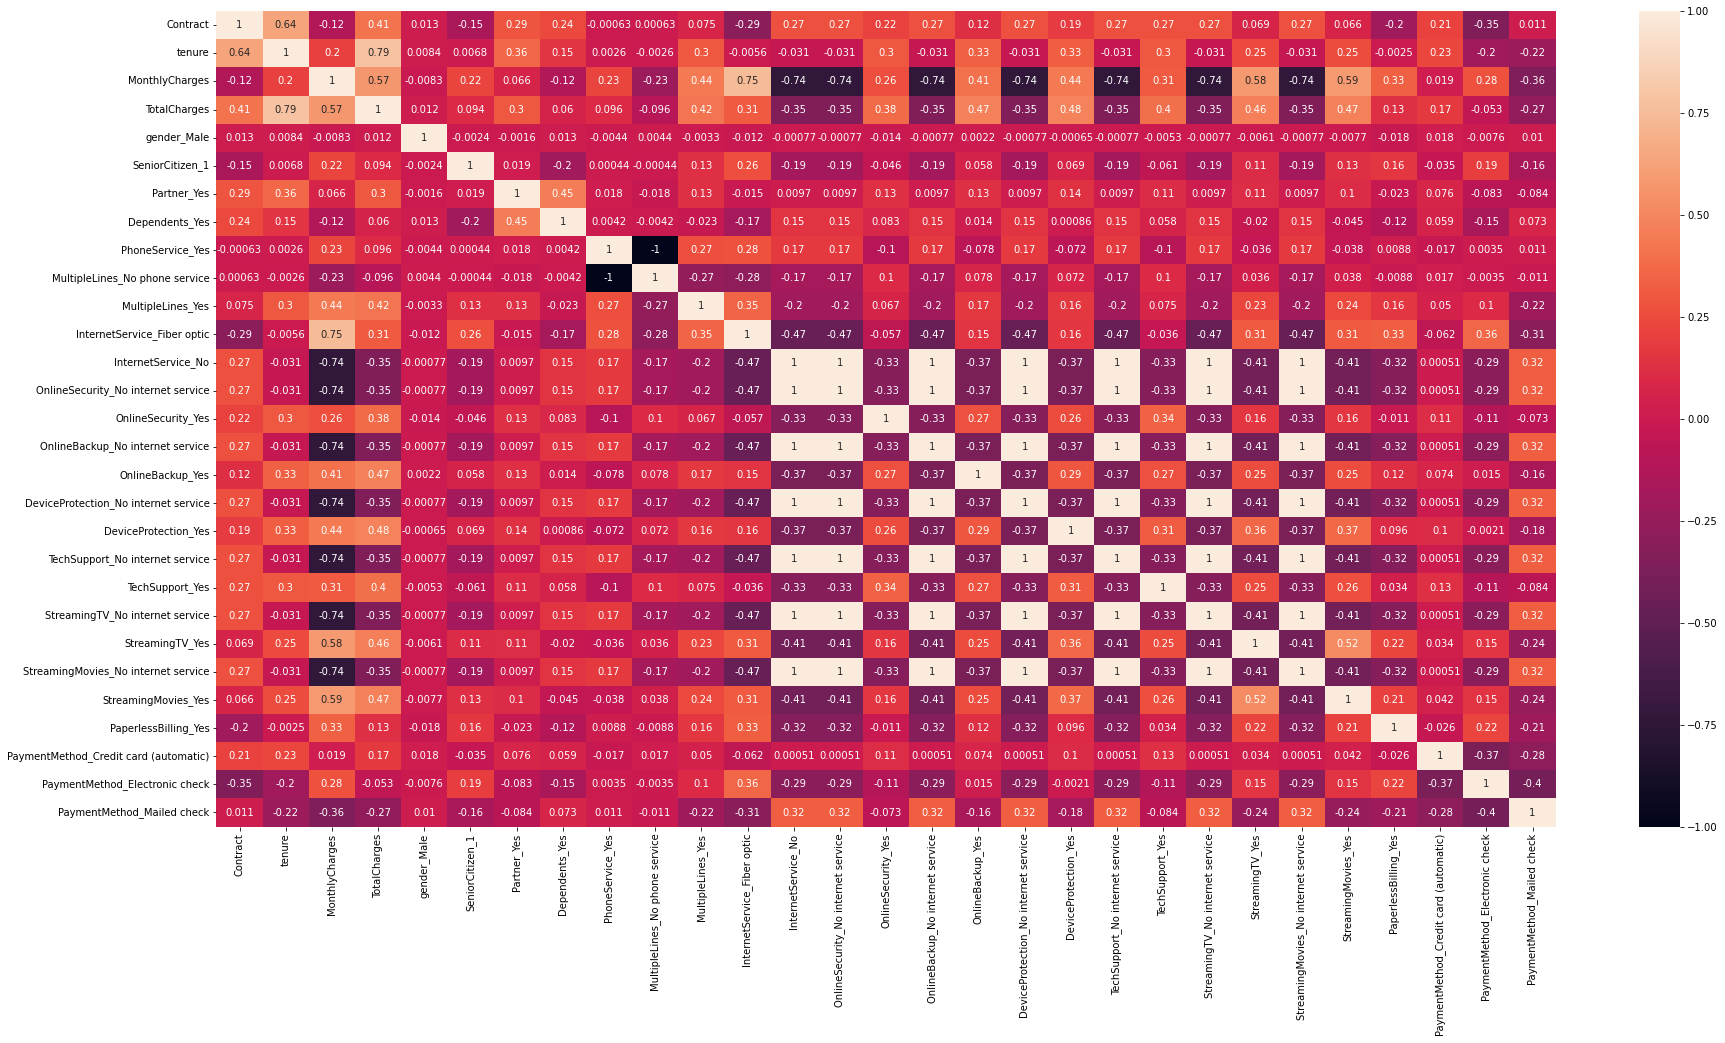

In [58]:
plt.rcParams['figure.figsize']=[30,15] 
sns.heatmap(x.corr(),annot=True)

## Multicollinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
 
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"]=x.columns


#calculating VIF for each feacture
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
 
print(vif_data.sort_values(by='VIF',ascending = False))    

                                  feature     VIF
19        TechSupport_No internet service     inf
17   DeviceProtection_No internet service     inf
15       OnlineBackup_No internet service     inf
13     OnlineSecurity_No internet service     inf
12                     InternetService_No     inf
21        StreamingTV_No internet service     inf
23    StreamingMovies_No internet service     inf
8                        PhoneService_Yes 27.5850
2                          MonthlyCharges 11.4106
3                            TotalCharges  5.7394
9          MultipleLines_No phone service  4.8192
1                                  tenure  4.5936
11            InternetService_Fiber optic  3.9653
0                                Contract  2.3197
27         PaymentMethod_Electronic check  2.0145
24                    StreamingMovies_Yes  1.9023
22                        StreamingTV_Yes  1.8767
28             PaymentMethod_Mailed check  1.8656
26  PaymentMethod_Credit card (automatic)  1.5715


In [60]:
high_vif_cols = ['TechSupport_No internet service',
                 'DeviceProtection_No internet service',
                 'OnlineBackup_No internet service',
                 'OnlineSecurity_No internet service',
                 'InternetService_No ',
                 'StreamingTV_No internet service',
                 'StreamingMovies_No internet service',
                 'PhoneService_Yes',
                 'MonthlyCharges']                    

In [61]:
x.drop(columns=list(vif_data[vif_data['VIF']>6]['feature']),inplace=True)
x

Contract  tenure  TotalCharges  gender_Male  SeniorCitizen_1  \
customerID                                                                 
7590-VHVEG         1 -1.2883       -0.9949            0                0   
5575-GNVDE         2  0.1558       -0.0756            1                0   
3668-QPYBK         1 -1.2445       -0.9562            1                0   
7795-CFOCW         2  0.6372       -0.0997            1                0   
9237-HQITU         1 -1.2445       -0.9347            0                0   
...              ...     ...           ...          ...              ...   
9661-ACXBS         1  0.5059        1.1659            0                0   
5656-JAMLX         3  1.3811       -0.3899            1                0   
3462-BJQQA         1 -1.0695       -0.7365            0                0   
0442-TDYUO         3  0.7685       -0.4975            1                0   
6733-LRIZX         3  0.1996        0.9804            1                0   

            Partner_Yes  Dependents_Yes  MultipleLines_No phone service  \
customerID                                                                
7590-VHVEG            1               0                               1   
5575-GNVDE            0               0                               0   
3668-QPYBK            0               0                               0   
7795-CFOCW            0               0                               1   
9237-HQITU            0               0                               0   
...                 ...             ...                             ...   
9661-ACXBS            0               0                               0   
5656-JAMLX            0               0                               0   
3462-BJQQA            0               0                               0   
0442-TDYUO            1               0                               0   
6733-LRIZX            0               0                               0   

            MultipleLines_Yes  InternetService_Fiber optic  \
customerID                                                   
7590-VHVEG                  0                            0   
5575-GNVDE                  0                            0   
3668-QPYBK                  0                            0   
7795-CFOCW                  0                            0   
9237-HQITU                  0                            1   
...                       ...                          ...   
9661-ACXBS                  1                            1   
5656-JAMLX                  0                            0   
3462-BJQQA                  1                            1   
0442-TDYUO                  0                            0   
6733-LRIZX                  1                            1   

            OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  \
customerID                                                               
7590-VHVEG                   0                 1                     0   
5575-GNVDE                   1                 0                     1   
3668-QPYBK                   1                 1                     0   
7795-CFOCW                   1                 0                     1   
9237-HQITU                   0                 0                     0   
...                        ...               ...                   ...   
9661-ACXBS                   1                 0                     1   
5656-JAMLX                   0                 0                     0   
3462-BJQQA                   0                 1                     0   
0442-TDYUO                   0                 0                     0   
6733-LRIZX                   1                 0                     1   

            TechSupport_Yes  StreamingTV_Yes  StreamingMovies_Yes  \
customerID                                                          
7590-VHVEG                0                0                    0   
5575-GNVDE                0                0                    0   
3

### Train test split

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [63]:
x_train.shape,y_train.shape

((4560, 20), (4560,))

In [64]:
x_test.shape,y_test.shape

((1140, 20), (1140,))

### Training Models

In [144]:
metric_df= pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1_score'])
metric_df

Empty DataFrame
Columns: [Model, Accuracy, Precision, Recall, f1_score]
Index: []

## Naive bayes

In [145]:
#plt.rcParams['figure.figsize']=[8,6]
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
#metrics.plot_confusion_matrix(nb,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("f1 score:",metrics.f1_score(y_test,y_pred))
dump(nb,"D:\Test models joblib\mp1_nb.joblib")

Accuracy: 0.7543859649122807
Precision: 0.5388235294117647
Recall: 0.731629392971246
f1 score: 0.6205962059620597


['D:\\Test models joblib\\mp1_nb.joblib']

In [146]:
metric_df.loc[len(metric_df)]=(['naive Bayes',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred),
                               metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0  naive Bayes    0.7544     0.5388  0.7316    0.6206

## KNN

In [147]:
#plt.rcParams['figure.figsize']=[8,6]
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
#metrics.plot_confusion_matrix(knn,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))
print("Precision:",metrics.precision_score(y_pred,y_test))
print("Recall:",metrics.recall_score(y_pred,y_test))
print("f1_score:",metrics.f1_score(y_pred,y_test))
dump(knn,"D:\Test models joblib\mp1_knn.joblib")

Accuracy: 0.756140350877193
Precision: 0.5143769968051118
Recall: 0.5609756097560976
f1_score: 0.5366666666666667


['D:\\Test models joblib\\mp1_knn.joblib']

In [148]:
metric_df.loc[len(metric_df)]=(['KNN',metrics.accuracy_score(y_pred,y_test),metrics.precision_score(y_pred,y_test)
                               ,metrics.recall_score(y_pred,y_test),metrics.f1_score(y_pred,y_test)])
metric_df


Model  Accuracy  Precision  Recall  f1_score
0  naive Bayes    0.7544     0.5388  0.7316    0.6206
1          KNN    0.7561     0.5144  0.5610    0.5367

## Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)
#metrics.plot_confusion_matrix(lg,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("f1_score:",metrics.f1_score(y_test,y_pred))
dump(lg,"D:\Test models joblib\mp1_lg.joblib")

Accuracy: 0.7719298245614035
Precision: 0.6007604562737643
Recall: 0.5047923322683706
f1_score: 0.548611111111111


['D:\\Test models joblib\\mp1_lg.joblib']

In [150]:
metric_df.loc[len(metric_df)]=(['logistic regression',metrics.accuracy_score(y_test,y_pred),
                                metrics.precision_score(y_test,y_pred)
                           ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0          naive Bayes    0.7544     0.5388  0.7316    0.6206
1                  KNN    0.7561     0.5144  0.5610    0.5367
2  logistic regression    0.7719     0.6008  0.5048    0.5486

## SVM

In [151]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)
#metrics.plot_confusion_matrix(sv,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Preecision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("f1_score:",metrics.f1_score(y_test,y_pred))
dump(sv,"D:\Test models joblib\mp1_svm.joblib")

Accuracy: 0.7824561403508772
Preecision: 0.631578947368421
Recall: 0.4984025559105431
f1_score: 0.557142857142857


['D:\\Test models joblib\\mp1_svm.joblib']

In [152]:
metric_df.loc[len(metric_df)]=(['svm',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                              ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0          naive Bayes    0.7544     0.5388  0.7316    0.6206
1                  KNN    0.7561     0.5144  0.5610    0.5367
2  logistic regression    0.7719     0.6008  0.5048    0.5486
3                  svm    0.7825     0.6316  0.4984    0.5571

## Decision tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
#metrics.plot_confusion_matrix(dt,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("f1 score:",metrics.f1_score(y_test,y_pred))
dump(dt,"D:\Test models joblib\mp1_dt.joblib")

Accuracy: 0.7026315789473684
Precision: 0.46107784431137727
Recall: 0.49201277955271566
f1 score: 0.47604327666151475


['D:\\Test models joblib\\mp1_dt.joblib']

In [154]:
metric_df.loc[len(metric_df)]=(['Decision tree',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                              ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0          naive Bayes    0.7544     0.5388  0.7316    0.6206
1                  KNN    0.7561     0.5144  0.5610    0.5367
2  logistic regression    0.7719     0.6008  0.5048    0.5486
3                  svm    0.7825     0.6316  0.4984    0.5571
4        Decision tree    0.7026     0.4611  0.4920    0.4760

## Hyperparameter Tuning

##### Hyperparameter tuning takes advantage of the processing infrastructure of Google Cloud to test different hyperparameter configurations when training your model. It can give you OPTIMIZED values for hyperparameters,  which MIXIMIZES your model's PREDUCTIVE ACCURACY. 

### Naive bayes

In [155]:
from sklearn.model_selection import GridSearchCV

grid_params = {'var_smoothing':[1/(10**x) for x in range(0,16)]}

nb_gs = GridSearchCV(GaussianNB(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
nb_gs.fit(x_train, y_train)
nb_gs.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


{'var_smoothing': 0.01}

Accuracy: 0.756140350877193
Recall: 0.7380191693290735
Precision: 0.5409836065573771
Recall: 0.7380191693290735
f1_score: 0.6243243243243244


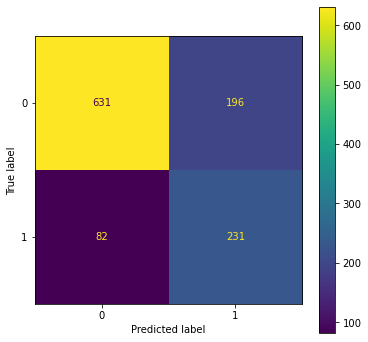

In [156]:
plt.rcParams['figure.figsize']=[6,6]
nb_gs = GaussianNB(var_smoothing = 0.01)
nb_gs.fit(x_train,y_train)
y_gs_pred = nb_gs.predict(x_test)
metrics.plot_confusion_matrix(nb_gs,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_gs_pred))
print("Recall:",metrics.recall_score(y_test,y_gs_pred))                                
print("Precision:",metrics.precision_score(y_test,y_gs_pred))
print("f1_score:",metrics.f1_score(y_test,y_gs_pred))

In [157]:
metric_df.loc[len(metric_df)]=(['optimized naive bayes',metrics.accuracy_score(y_test,y_gs_pred),
                                metrics.precision_score(y_test,y_gs_pred),metrics.recall_score(y_test,y_gs_pred),
                                                    metrics.f1_score(y_test,y_gs_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0            naive Bayes    0.7544     0.5388  0.7316    0.6206
1                    KNN    0.7561     0.5144  0.5610    0.5367
2    logistic regression    0.7719     0.6008  0.5048    0.5486
3                    svm    0.7825     0.6316  0.4984    0.5571
4          Decision tree    0.7026     0.4611  0.4920    0.4760
5  optimized naive bayes    0.7561     0.5410  0.7380    0.6243

### KNN

In [158]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15,17,19],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

knn_gs = GridSearchCV(KNeighborsClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
knn_gs.fit(x_train, y_train)
knn_gs.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'metric': 'minkowski', 'n_neighbors': 17, 'weights': 'uniform'}

Accuracy: 0.762280701754386
precision: 0.5777777777777777
Recall: 0.4984025559105431
f1_score: 0.5351629502572898


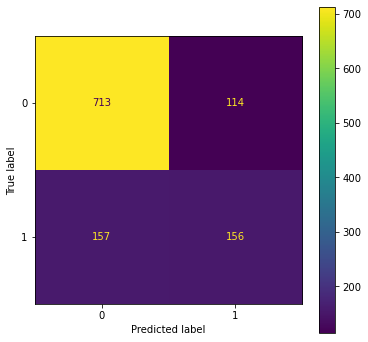

In [159]:
knn_gs = KNeighborsClassifier(metric = 'minkowski', n_neighbors = 17, weights = 'uniform')
knn_gs.fit(x_train,y_train)
y_knn_pred = knn_gs.predict(x_test)
metrics.plot_confusion_matrix(knn_gs,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_knn_pred))
print("precision:",metrics.precision_score(y_test,y_knn_pred))
print("Recall:",metrics.recall_score(y_test,y_knn_pred))
print("f1_score:",metrics.f1_score(y_test,y_knn_pred))

In [160]:
metric_df.loc[len(metric_df)]=(['optimized knn',metrics.accuracy_score(y_test,y_knn_pred)
                                ,metrics.precision_score(y_test,y_knn_pred),metrics.recall_score(y_test,y_knn_pred)
                               ,metrics.f1_score(y_test,y_knn_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0            naive Bayes    0.7544     0.5388  0.7316    0.6206
1                    KNN    0.7561     0.5144  0.5610    0.5367
2    logistic regression    0.7719     0.6008  0.5048    0.5486
3                    svm    0.7825     0.6316  0.4984    0.5571
4          Decision tree    0.7026     0.4611  0.4920    0.4760
5  optimized naive bayes    0.7561     0.5410  0.7380    0.6243
6          optimized knn    0.7623     0.5778  0.4984    0.5352

### Logistic Regression

In [161]:
from sklearn.model_selection import GridSearchCV

grid_params = {'penalty':['l1', 'l2', 'elasticnet','none'],
              'C':[0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag','saga']}

lg_gs = GridSearchCV(LogisticRegression(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
lg_gs.fit(x_train, y_train)
lg_gs.best_params_

Fitting 3 folds for each of 160 candidates, totalling 480 fits


{'C': 0.75, 'penalty': 'l1', 'solver': 'liblinear'}

Accuracy: 0.7728070175438596
Precision: 0.6030534351145038
Recall: 0.5047923322683706
f1_score: 0.5495652173913044


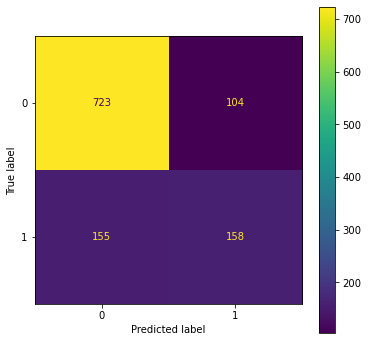

In [162]:
lg_gs = LogisticRegression(C= 0.75, penalty= 'l1', solver= 'liblinear')
lg_gs.fit(x_train,y_train)
y_gs_pred = lg_gs.predict(x_test)
metrics.plot_confusion_matrix(lg_gs,x_test,y_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision:",metrics.precision_score(y_test,y_gs_pred))
print("Recall:",metrics.recall_score(y_test,y_gs_pred))
print("f1_score:",metrics.f1_score(y_test,y_gs_pred))

In [163]:
metric_df.loc[len(metric_df)]=(['optimized L,G',metrics.accuracy_score(y_test,y_gs_pred)
                              ,metrics.precision_score(y_test,y_gs_pred)
                              ,metrics.recall_score(y_test,y_gs_pred)
                              ,metrics.f1_score(y_test,y_gs_pred)])
metric_df 

Model  Accuracy  Precision  Recall  f1_score
0            naive Bayes    0.7544     0.5388  0.7316    0.6206
1                    KNN    0.7561     0.5144  0.5610    0.5367
2    logistic regression    0.7719     0.6008  0.5048    0.5486
3                    svm    0.7825     0.6316  0.4984    0.5571
4          Decision tree    0.7026     0.4611  0.4920    0.4760
5  optimized naive bayes    0.7561     0.5410  0.7380    0.6243
6          optimized knn    0.7623     0.5778  0.4984    0.5352
7          optimized L,G    0.7728     0.6031  0.5048    0.5496

### SVM

In [164]:
"""from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

grid_params = { 'C':[1,2,5,10],
               'kernel':['rbf','poly','sigmoid','linear'],
               'degree':[1,2,3,4,5],
               'gamma': [1, 0.1, 0.01, 0.001]}

svm_gs = RandomizedSearchCV(SVC(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
svm_gs.fit(X_train, y_train)
svm_gs.best_params_"""

"from sklearn.model_selection import GridSearchCV,RandomizedSearchCV\n\ngrid_params = { 'C':[1,2,5,10],\n               'kernel':['rbf','poly','sigmoid','linear'],\n               'degree':[1,2,3,4,5],\n               'gamma': [1, 0.1, 0.01, 0.001]}\n\nsvm_gs = RandomizedSearchCV(SVC(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)\nsvm_gs.fit(X_train, y_train)\nsvm_gs.best_params_"

Accuracy :  0.7798245614035088
Precision :  0.6165413533834586
Recall :  0.5239616613418531
f1_Score :  0.5664939550949913


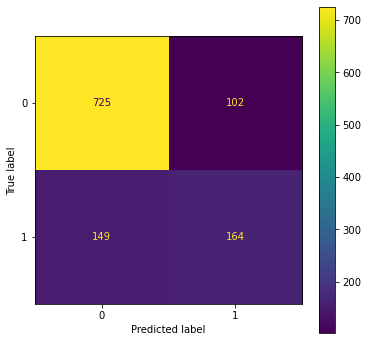

In [165]:
svm_gs = SVC(kernel= 'linear', gamma= 0.01, degree= 5, C= 5)
svm_gs.fit(x_train,y_train)
y_gs_pred = svm_gs.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(svm_gs,x_test,y_test)

In [166]:
metric_df.loc[len(metric_df)] = (['Optimized SVM',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0            naive Bayes    0.7544     0.5388  0.7316    0.6206
1                    KNN    0.7561     0.5144  0.5610    0.5367
2    logistic regression    0.7719     0.6008  0.5048    0.5486
3                    svm    0.7825     0.6316  0.4984    0.5571
4          Decision tree    0.7026     0.4611  0.4920    0.4760
5  optimized naive bayes    0.7561     0.5410  0.7380    0.6243
6          optimized knn    0.7623     0.5778  0.4984    0.5352
7          optimized L,G    0.7728     0.6031  0.5048    0.5496
8          Optimized SVM    0.7798     0.6165  0.5240    0.5665

### Decision tree

In [167]:
"""from sklearn.model_selection import GridSearchCV

grid_params = { 'criterion': ["gini", "entropy"],
                'max_depth': range(2,11),
                'min_samples_split': range(5,50,5),
                'min_samples_leaf': range(1,11),
                'ccp_alpha' : np.arange(0, 0.3, 0.03).tolist(),
               'random_state':[42]}

dt_gs = GridSearchCV(DecisionTreeClassifier(), grid_params,verbose=1, n_jobs = -1,scoring='f1',cv=3)
dt_gs.fit(X_train, y_train)
dt_gs.best_params_"""

'from sklearn.model_selection import GridSearchCV\n\ngrid_params = { \'criterion\': ["gini", "entropy"],\n                \'max_depth\': range(2,11),\n                \'min_samples_split\': range(5,50,5),\n                \'min_samples_leaf\': range(1,11),\n                \'ccp_alpha\' : np.arange(0, 0.3, 0.03).tolist(),\n               \'random_state\':[42]}\n\ndt_gs = GridSearchCV(DecisionTreeClassifier(), grid_params,verbose=1, n_jobs = -1,scoring=\'f1\',cv=3)\ndt_gs.fit(X_train, y_train)\ndt_gs.best_params_'

Accuracy :  0.7508771929824561
Precision :  0.5403899721448467
Recall :  0.6198083067092651
f1_Score :  0.5773809523809523


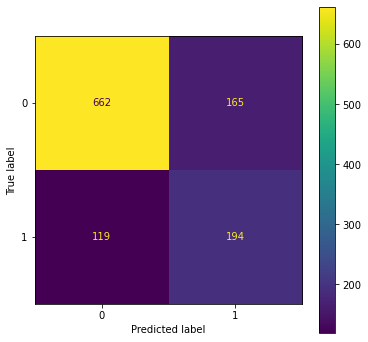

In [168]:
dt_gs = DecisionTreeClassifier(ccp_alpha= 0.0,
            criterion =  'gini',
            max_depth = 2,
            min_samples_leaf = 1,
            min_samples_split = 5,
            random_state = 42)
dt_gs.fit(x_train,y_train)
y_gs_pred = dt_gs.predict(x_test)
print("Accuracy : ",metrics.accuracy_score(y_test,y_gs_pred))
print("Precision : ",metrics.precision_score(y_test,y_gs_pred))
print("Recall : ",metrics.recall_score(y_test,y_gs_pred))
print("f1_Score : ",metrics.f1_score(y_test,y_gs_pred))
metrics.plot_confusion_matrix(dt_gs,x_test,y_test)

In [169]:
metric_df.loc[len(metric_df)] = (['Optimized Decision Tree',metrics.accuracy_score(y_test,y_gs_pred),metrics.precision_score(y_test,y_gs_pred)
                 ,metrics.recall_score(y_test,y_gs_pred),metrics.f1_score(y_test,y_gs_pred)])
metric_df

Model  Accuracy  Precision  Recall  f1_score
0              naive Bayes    0.7544     0.5388  0.7316    0.6206
1                      KNN    0.7561     0.5144  0.5610    0.5367
2      logistic regression    0.7719     0.6008  0.5048    0.5486
3                      svm    0.7825     0.6316  0.4984    0.5571
4            Decision tree    0.7026     0.4611  0.4920    0.4760
5    optimized naive bayes    0.7561     0.5410  0.7380    0.6243
6            optimized knn    0.7623     0.5778  0.4984    0.5352
7            optimized L,G    0.7728     0.6031  0.5048    0.5496
8            Optimized SVM    0.7798     0.6165  0.5240    0.5665
9  Optimized Decision Tree    0.7509     0.5404  0.6198    0.5774

In [170]:
dump(nb_gs,"../Model_Objects/mp1_best_model.joblib")

['../Model_Objects/mp1_best_model.joblib']

In [171]:
fimp = pd.DataFrame(list(zip(dt.feature_names_in_,dt.feature_importances_)),columns=['Features','Importance'])
fimp['Importance_Percent'] = fimp['Importance']*100
fimp.sort_values(by='Importance_Percent',ascending=False,inplace=True)

In [172]:
fimp['Importance_Percent'].sum()

99.99999999999997